## Index

### index object

In [5]:
import pandas as pd
import numpy as np

自己建一个index object

In [6]:
index = pd.Index(["Shanghai", "Hangzhou", "Beijing", "Guangzhou"])
index

Index(['Shanghai', 'Hangzhou', 'Beijing', 'Guangzhou'], dtype='object')

In [7]:
"Shanghai" in index

True

从Series里面拿出一个index object

In [8]:
obj = pd.Series(range(3), index = ['a', 'b', 'c'])
index = obj.index
print(index)
print(index[1:])

Index(['a', 'b', 'c'], dtype='object')
Index(['b', 'c'], dtype='object')


index的值是不能被更改的

In [9]:
index[1] = 'd'

TypeError: Index does not support mutable operations

创建Series时声明index

In [10]:
index = pd.Index(np.arange(3))
obj2 = pd.Series([2,5,7], index=index)
print(obj2)

0    2
1    5
2    7
dtype: int64


sex_index

In [11]:
df = pd.DataFrame({"city": ["Beijing", "Beijing", "Shanghai", "Shanghai"],
                "year": [2016, 2017, 2016, 2017],
                "label": [0, 1, 2, 3],
                  "population": [2100, 2200, 2300, 2400],})
df

,city,label,population,year
0,Beijing,0,2100,2016
1,Beijing,1,2200,2017
2,Shanghai,2,2300,2016
3,Shanghai,3,2400,2017


In [13]:
df_label = df.set_index("label")
df_label

,city,population,year
label,,,
0,Beijing,2100,2016
1,Beijing,2200,2017
2,Shanghai,2300,2016
3,Shanghai,2400,2017


In [14]:
df.set_index("label", drop=False)

,city,label,population,year
label,,,,
0,Beijing,0,2100,2016
1,Beijing,1,2200,2017
2,Shanghai,2,2300,2016
3,Shanghai,3,2400,2017


In [15]:
df.set_index(["city", "year"])

label  population
city     year                   
Beijing  2016      0        2100
         2017      1        2200
Shanghai 2016      2        2300
         2017      3        2400

In [16]:
df_label.set_index(["city", "year"])

population
city     year            
Beijing  2016        2100
         2017        2200
Shanghai 2016        2300
         2017        2400

In [18]:
df3 = df_label.set_index(["city", "year"], append=True)

In [19]:
df3

,,,population
label,city,year,
0,Beijing,2016,2100
1,Beijing,2017,2200
2,Shanghai,2016,2300
3,Shanghai,2017,2400


In [20]:
df3.reset_index()

,label,city,year,population
0,0,Beijing,2016,2100
1,1,Beijing,2017,2200
2,2,Shanghai,2016,2300
3,3,Shanghai,2017,2400


In [21]:
df3.reset_index(level=1)

,,city,population
label,year,,
0,2016,Beijing,2100
1,2017,Beijing,2200
2,2016,Shanghai,2300
3,2017,Shanghai,2400


In [22]:
df3.reset_index(level=[0,1])

,label,city,population
year,,,
2016,0,Beijing,2100
2017,1,Beijing,2200
2016,2,Shanghai,2300
2017,3,Shanghai,2400


In [24]:
df3.index

MultiIndex(levels=[[0, 1, 2, 3], ['Beijing', 'Shanghai'], [2016, 2017]],
           labels=[[0, 1, 2, 3], [0, 0, 1, 1], [0, 1, 0, 1]],
           names=['label', 'city', 'year'])

### 针对index进行索引和切片

In [26]:
s = pd.Series(np.arange(4), index=['a', 'b', 'c', 'd'])
print(s['b'])

1


默认的数字index依旧可以使用

In [27]:
print(s[3])
print(s[[1,3]])

3
b    1
d    3
dtype: int64


下面是如何对Series进行切片

In [29]:
print(s['b':'c'])
s['b':'c'] = 5
print(s)

b    5
c    5
dtype: int64
a    0
b    5
c    5
d    3
dtype: int64


对DataFrame进行Indexing与Series基本相同

In [32]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                    index = ['a', 'c', 'd'],
                    columns = ['Hangzhou', 'Shenzhen', 'Nanjing'])
print(df)

   Hangzhou  Shenzhen  Nanjing
a         0         1        2
c         3         4        5
d         6         7        8


In [33]:
print(df['Hangzhou'])

a    0
c    3
d    6
Name: Hangzhou, dtype: int64


In [34]:
print(df[['Shenzhen', 'Nanjing']])

   Shenzhen  Nanjing
a         1        2
c         4        5
d         7        8


In [35]:
print(df[:2])

   Hangzhou  Shenzhen  Nanjing
a         0         1        2
c         3         4        5


In [36]:
print(df.loc['a'])

Hangzhou    0
Shenzhen    1
Nanjing     2
Name: a, dtype: int64


In [38]:
print(df.loc[['a','d'], ['Shenzhen', 'Nanjing']])

   Shenzhen  Nanjing
a         1        2
d         7        8


In [39]:
print(df.loc[:'c', 'Hangzhou'])

a    0
c    3
Name: Hangzhou, dtype: int64


DataFrame也可以用condition selection

In [40]:
print(df[df.Hangzhou > 1])

   Hangzhou  Shenzhen  Nanjing
c         3         4        5
d         6         7        8


In [41]:
print(df < 5)

   Hangzhou  Shenzhen  Nanjing
a      True      True     True
c      True      True    False
d     False     False    False


In [42]:
df[df < 5] = 0
print(df)

   Hangzhou  Shenzhen  Nanjing
a         0         0        0
c         0         0        5
d         6         7        8


### [reindex](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html)

把一个Series或者DataFrame按照新的index顺序进行重排

In [138]:
s = pd.Series([4.5, 7.2, -5.3, 3.2], index=['d', 'b', 'a', 'c'])
print(s)

d    4.5
b    7.2
a   -5.3
c    3.2
dtype: float64


In [139]:
s = s.reindex(['a', 'b', 'c', 'd', 'e'])
print(s)

a   -5.3
b    7.2
c    3.2
d    4.5
e    NaN
dtype: float64


In [140]:
s = pd.Series(['blue', 'purple', 'yellow'], index = [0,2,4])
print(s)

0      blue
2    purple
4    yellow
dtype: object


In [141]:
print(s.reindex(range(6), method='ffill'))

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


In [142]:
print(s.reindex(range(6), method='bfill'))

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object


既然我们可以对Series进行reindex，相应地，我们也可以用同样的方法对DataFrame进行reindex。

In [43]:
df = pd.DataFrame(np.arange(9).reshape(3,3), 
                    index = ['a', 'c', 'd'],
                    columns = ['Hangzhou', 'Shenzhen', 'Nanjing'])
print(df)

   Hangzhou  Shenzhen  Nanjing
a         0         1        2
c         3         4        5
d         6         7        8


In [45]:
df = df.reindex(['a', 'b', 'c', 'd'])
print(df)

   Hangzhou  Shenzhen  Nanjing
a       0.0       1.0      2.0
b       NaN       NaN      NaN
c       3.0       4.0      5.0
d       6.0       7.0      8.0


在reindex的同时，我们还可以重新指定columns

In [47]:
print(df.reindex(columns = ['Shenzhen', 'Hangzhou', 'Chongqing']))

   Shenzhen  Hangzhou  Chongqing
a       1.0       0.0        NaN
b       NaN       NaN        NaN
c       4.0       3.0        NaN
d       7.0       6.0        NaN


In [ ]:
下面介绍如何用drop来删除Series和DataFrame中的index

In [53]:
print(df)
df2 = df.drop("b")
print(df2)

   Hangzhou  Shenzhen  Nanjing
a       0.0       1.0      2.0
b       NaN       NaN      NaN
c       3.0       4.0      5.0
d       6.0       7.0      8.0
   Hangzhou  Shenzhen  Nanjing
a       0.0       1.0      2.0
c       3.0       4.0      5.0
d       6.0       7.0      8.0


In [54]:
print(df.drop(["a","c"]))

   Hangzhou  Shenzhen  Nanjing
b       NaN       NaN      NaN
d       6.0       7.0      8.0


In [55]:
print(df)

   Hangzhou  Shenzhen  Nanjing
a       0.0       1.0      2.0
b       NaN       NaN      NaN
c       3.0       4.0      5.0
d       6.0       7.0      8.0


drop不仅仅可以删除行，还可以删除列

In [56]:
print(df.drop('Shenzhen', axis=1))

   Hangzhou  Nanjing
a       0.0      2.0
b       NaN      NaN
c       3.0      5.0
d       6.0      8.0


In [57]:
print(df.drop(['Shenzhen', 'Hangzhou'], axis=1))

   Nanjing
a      2.0
b      NaN
c      5.0
d      8.0


### hierarchical index

In [2]:
import numpy as np
import pandas as pd

Series的hierarchical indexing

In [75]:
data = pd.Series(np.random.randn(10), index=[['a','a','a','b','b','c','c','c','d','d'], [1,2,3,1,2,1,2,3,1,2]])
print(data)

a  1   -0.675313
   2   -0.927307
   3    0.498790
b  1   -1.372427
   2   -0.133618
c  1    0.307804
   2   -0.753432
   3   -0.743689
d  1   -1.279995
   2    1.958051
dtype: float64


In [76]:
print(data.index)

MultiIndex(levels=[['a', 'b', 'c', 'd'], [1, 2, 3]],
           labels=[[0, 0, 0, 1, 1, 2, 2, 2, 3, 3], [0, 1, 2, 0, 1, 0, 1, 2, 0, 1]])


In [77]:
print(data.b)

1   -1.372427
2   -0.133618
dtype: float64


In [78]:
print(data['b':'c'])

b  1   -1.372427
   2   -0.133618
c  1    0.307804
   2   -0.753432
   3   -0.743689
dtype: float64


In [79]:
print(data[:2])

a  1   -0.675313
   2   -0.927307
dtype: float64


unstack和stack可以帮助我们在hierarchical indexing和DataFrame之间进行切换。

In [80]:
print(data.unstack())
print(type(data.unstack()))

          1         2         3
a -0.675313 -0.927307  0.498790
b -1.372427 -0.133618       NaN
c  0.307804 -0.753432 -0.743689
d -1.279995  1.958051       NaN
<class 'pandas.core.frame.DataFrame'>


In [81]:
print(data.unstack().stack())
print(type(data.unstack().stack()))

a  1   -0.675313
   2   -0.927307
   3    0.498790
b  1   -1.372427
   2   -0.133618
c  1    0.307804
   2   -0.753432
   3   -0.743689
d  1   -1.279995
   2    1.958051
dtype: float64
<class 'pandas.core.series.Series'>


DataFrame的hierarchical indexing

In [82]:
frame = pd.DataFrame(np.arange(12).reshape((4,3)),
                    index = [['a','a','b','b'], [1,2,1,2]],
                    columns = [['Beijing', 'Beijing', 'Shanghai'], ['apts', 'cars', 'apts']])
print(frame)

    Beijing      Shanghai
       apts cars     apts
a 1       0    1        2
  2       3    4        5
b 1       6    7        8
  2       9   10       11


In [84]:
frame.index.names = ['key1', 'key2']
frame.columns.names = ['city', 'type']
print(frame)

city      Beijing      Shanghai
type         apts cars     apts
key1 key2                      
a    1          0    1        2
     2          3    4        5
b    1          6    7        8
     2          9   10       11


In [97]:
frame.loc['a'].loc[2]["Shanghai"]["apts"]

5

## csv文件读写

- [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [to_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)

In [100]:
%matplotlib inline

In [98]:
goog = pd.read_csv("data/GOOG.csv", index_col=0)
goog.reindex(pd.to_datetime(goog.index))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
2004-08-24,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
2004-08-27,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
2004-08-30,52.443428,52.548038,50.814533,50.814533,50.814533,5221400
2004-08-31,50.958992,51.661362,50.889256,50.993862,50.993862,4941200


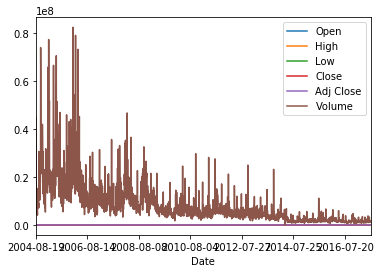

In [101]:
goog.plot()

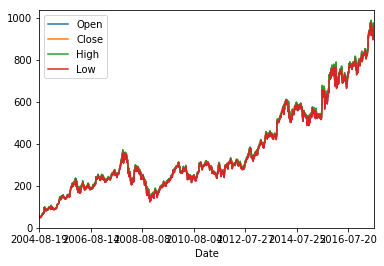

In [106]:
goog[["Open", "Close", "High", "Low"]].plot()

In [107]:
df

,Hangzhou,Shenzhen,Nanjing
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [108]:
df.to_csv("data/sample.csv")

In [119]:
df.to_csv("sample.tsv", sep=" ")

In [120]:
df

,Hangzhou,Shenzhen,Nanjing
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0
